Credit Card Fraud Detection Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import seaborn as sns


In [2]:
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
credit_card_data.head() #prints the first five rows from the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_card_data.tail() #prints the last five rows from the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_card_data.columns #prints all the column names from the dataset

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
#prints the dimension's of the dataset
print("df.shape -->", credit_card_data.shape)
print("Rows     -->", credit_card_data.shape[0])
print("Columns  -->", credit_card_data.shape[1])

df.shape --> (284807, 31)
Rows     --> 284807
Columns  --> 31


In [7]:
credit_card_data.dtypes #prints the datatype of all columns

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
credit_card_data.describe() #prints the statistical summary of the dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
credit_card_data.info()  #prints the the information related to the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
credit_card_data.isnull().sum()  #Checks for missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
credit_card_data["Class"].value_counts()  #prints the frequency of each class

Class
0    284315
1       492
Name: count, dtype: int64

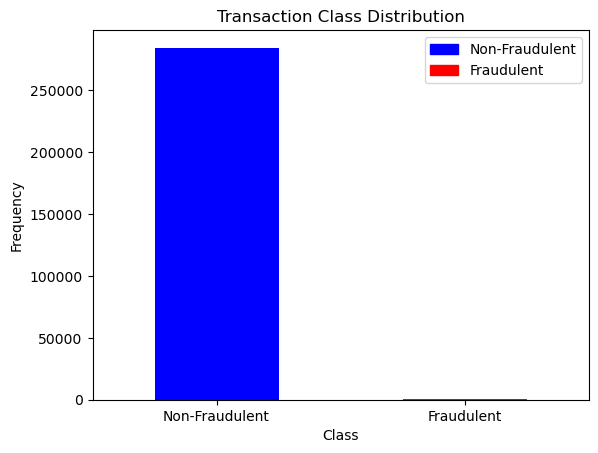

In [12]:
# Visualize class distribution for imbalanced dataset 
LABELS = ["Non-Fraudulent", "Fraudulent"]
count_classes = pd.value_counts(credit_card_data['Class'], sort =True)
count_classes.plot(kind='bar',rot=0,color=['blue', 'red'])
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['blue', 'red']]
plt.legend(handles, LABELS)

In [13]:
# Data of respective legit and fruad cases stored seperately
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data.Class==1]

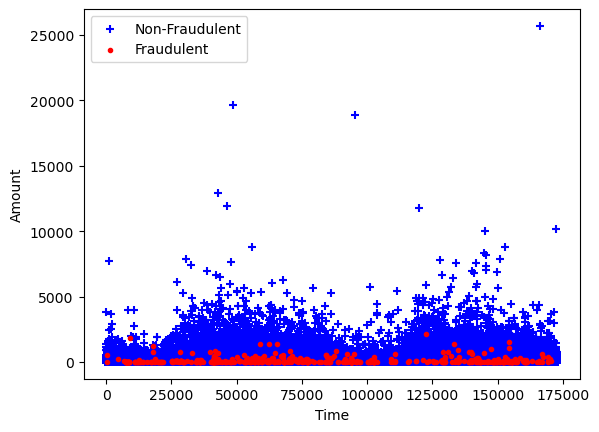

In [14]:
# Visualize distribution based on Time and Amount 
plt.xlabel('Time')
plt.ylabel('Amount')
plt.scatter(legit['Time'],legit['Amount'],color='blue',marker='+',label='Non-Fraudulent')
plt.scatter(fraud['Time'],fraud['Amount'],color='red',marker='.',label='Fraudulent')
plt.legend()

Text(0.5, 1.0, 'Heatmap correlation')

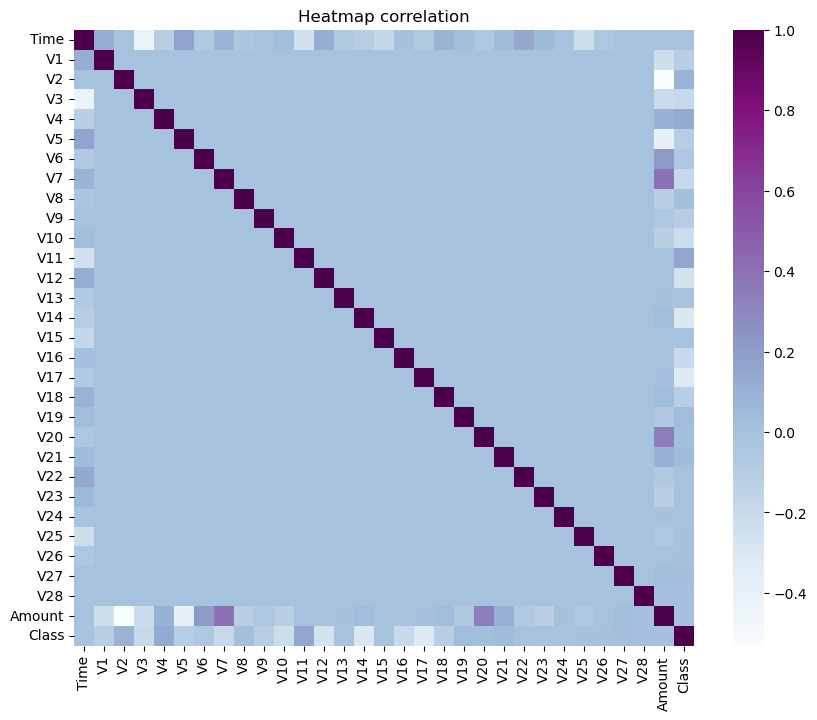

In [15]:
# Visualize correlation using a heatmap for imbalanced dataset 
plt.figure(figsize=(10,8))
corr=credit_card_data.corr()
sns.heatmap(corr,cmap='BuPu')
plt.title('Heatmap correlation')

In [17]:

X = credit_card_data.drop('Class',axis = 'columns')
y  = credit_card_data['Class']
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [18]:
# Address class imbalance using SMOTE
smote  = SMOTE(sampling_strategy = 'minority',random_state =2)
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [41]:
#new balanced dataset
balanced_data = pd.concat([pd.DataFrame(X_sm, columns=X.columns), pd.DataFrame(y_sm, columns=['Class'])], axis=1)

Text(0.5, 1.0, 'Heatmap correlation after balancing dataset')

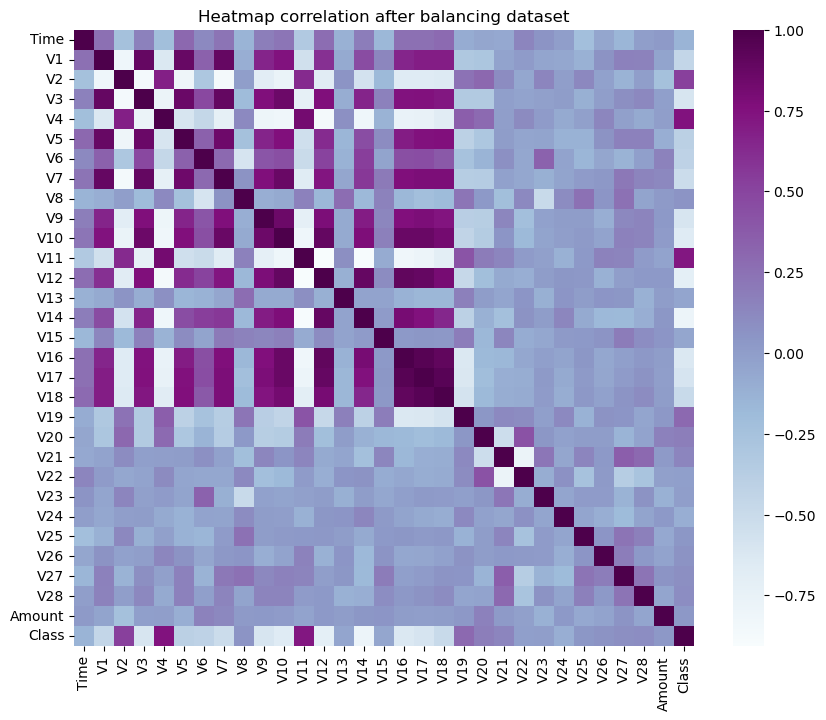

In [42]:
# Visualize correlation using a heatmap for balanced dataset 
plt.figure(figsize=(10, 8))
corr = balanced_data.corr()
sns.heatmap(corr, cmap='BuPu')
plt.title('Heatmap correlation after balancing dataset')

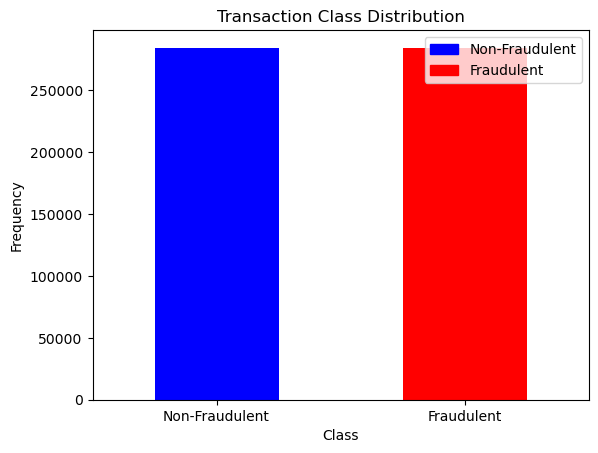

In [20]:
# Visualize class distribution for balanced dataset 
LABELS = ["Non-Fraudulent", "Fraudulent"]
count_classes = pd.value_counts(y_sm, sort =True)
count_classes.plot(kind='bar',rot=0,color=['blue', 'red'])
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in ['blue', 'red']]
plt.legend(handles, LABELS)

In [21]:
# Split data into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X_sm, y_sm, test_size=0.4, random_state =2,stratify=y_sm)

In [22]:
y_train.value_counts()

Class
0    170589
1    170589
Name: count, dtype: int64

In [23]:
y_test.value_counts()

Class
0    113726
1    113726
Name: count, dtype: int64

In [24]:
# Logistic Regression
model_lg = LogisticRegression(random_state=2)

In [25]:
model_lg.fit(X_train, y_train)

LogisticRegression(random_state=2)

In [26]:
# Metrics evaluation
X_test_prediction_lg = model_lg.predict(X_test)
test_data_accuracy_lg  = metrics.accuracy_score(y_test,X_test_prediction_lg)
test_data_precision_lg = metrics.precision_score(y_test,X_test_prediction_lg)
test_data_recall_lg = metrics.recall_score(y_test,X_test_prediction_lg)
test_data_f1_lg = metrics.f1_score(y_test,X_test_prediction_lg)

In [27]:
print("Accuracy on test data:", test_data_accuracy_lg)
print("precision on test data:", test_data_precision_lg)
print("recall on test data:", test_data_recall_lg)
print("f1 on test data:", test_data_f1_lg)

Accuracy on test data: 0.971695126883914
precision on test data: 0.9790327189598514
recall on test data: 0.9640363681128326
f1 on test data: 0.9714766736077267


In [28]:
# Random Forest
rf_model = RandomForestClassifier(random_state=2)

In [29]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [30]:
# Metrics evaluation
X_test_prediction_rf = rf_model.predict(X_test)
test_data_accuracy_rf  = metrics.accuracy_score(y_test,X_test_prediction_rf)
test_data_precision_rf = metrics.precision_score(y_test,X_test_prediction_rf)
test_data_recall_rf = metrics.recall_score(y_test,X_test_prediction_rf)
test_data_f1_rf = metrics.f1_score(y_test,X_test_prediction_rf)

In [31]:
print("Accuracy on test data:", test_data_accuracy_rf)
print("precision on test data:", test_data_precision_rf)
print("recall on test data:", test_data_recall_rf)
print("f1 on test data:", test_data_f1_rf)

Accuracy on test data: 0.9998461213794558
precision on test data: 0.9997186936837941
recall on test data: 0.9999736208079067
f1 on test data: 0.9998461409963909


In [32]:
# Ada Boost Classifier
ada_boost = AdaBoostClassifier(n_estimators=101, random_state=2)

In [33]:
ada_boost.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=101, random_state=2)

In [34]:
# Metrics evaluation
X_test_prediction_ada = ada_boost.predict(X_test)
test_data_accuracy_ada  = metrics.accuracy_score(y_test,X_test_prediction_ada)
test_data_precision_ada = metrics.precision_score(y_test,X_test_prediction_ada)
test_data_recall_ada = metrics.recall_score(y_test,X_test_prediction_ada)
test_data_f1_ada = metrics.f1_score(y_test,X_test_prediction_ada)

In [35]:
print("Accuracy on test data:", test_data_accuracy_ada)
print("precision on test data:", test_data_precision_ada)
print("recall on test data:", test_data_recall_ada)
print("f1 on test data:", test_data_f1_ada)

Accuracy on test data: 0.9868719554015792
precision on test data: 0.990955843234616
recall on test data: 0.9827128361148726
f1 on test data: 0.9868171262571411


In [36]:
# XG Boost Classifier
XGB_ensemble = xgb.XGBClassifier(max_depth=4, n_estimators=100,random_state=2)

In [37]:
XGB_ensemble.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=2, ...)

In [38]:
# Metrics evaluation
X_test_prediction_xgb = XGB_ensemble.predict(X_test)
test_data_accuracy_xgb  = metrics.accuracy_score(y_test,X_test_prediction_xgb)
test_data_precision_xgb = metrics.precision_score(y_test,X_test_prediction_xgb)
test_data_recall_xgb = metrics.recall_score(y_test,X_test_prediction_xgb)
test_data_f1_xgb = metrics.f1_score(y_test,X_test_prediction_xgb)

In [39]:
print("Accuracy on test data:", test_data_accuracy_xgb)
print("precision on test data:", test_data_precision_xgb)
print("recall on test data:", test_data_recall_xgb)
print("f1 on test data:", test_data_f1_xgb)

Accuracy on test data: 0.9994064681779012
precision on test data: 0.9988932125822405
recall on test data: 0.9999208624237201
f1 on test data: 0.9994067733302866


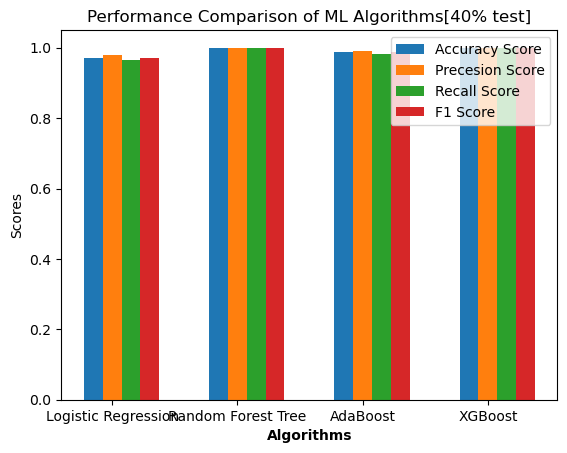

In [40]:
import numpy as np

# Assuming you have performance metrics for each algorithm[40%test] 
accuracy_scores = [0.971695126883914,0.9998461213794558,0.9868719554015792,0.9994064681779012]
precision_scores = [0.9790327189598514,0.9997186936837941,0.990955843234616,0.9988932125822405] 
recall_scores = [0.9640363681128326,0.9999736208079067,0.9827128361148726,0.9999208624237201] 
f1_scores = [0.9714766736077267,0.9998461409963909,0.9868171262571411,0.9994067733302866] 
# List of algorithms 
algorithms = ['Logistic Regression', 'Random Forest Tree','AdaBoost', 'XGBoost'] 
# Set the width of the bars 
bar_width = 0.15 
# Set the position of each bar on X-axis 
r1 = np.arange(len(algorithms)) 
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2] 
r4 = [x + bar_width for x in r3] 
r5 = [x + bar_width for x in r4] 
# Create bar plot 
plt.bar(r2, accuracy_scores, width=bar_width, label='Accuracy Score') 
plt.bar(r3, precision_scores, width=bar_width, label='Precesion Score') 
plt.bar(r4, recall_scores, width=bar_width, label='Recall Score') 
plt.bar(r5, f1_scores, width=bar_width, label='F1 Score') 
# Add labels to the chart 
plt.xlabel('Algorithms', fontweight='bold') 
plt.xticks([r + 2*bar_width for r in range(len(algorithms))], algorithms) 
plt.ylabel('Scores')
plt.title('Performance Comparison of ML Algorithms[40% test]') 
# Show legend 
plt.legend() 
# Show the plot 
plt.show() 